# Flood prediction Model

# Data Insight

In [1]:
#Import some basic libraries
import numpy as np
import pandas as pd

In [2]:
#Read the data present in dataset
data = pd.read_csv('kerala.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [3]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [4]:
#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [5]:
#Let's see how are data looks like now
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [6]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,2:14]
x.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [7]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

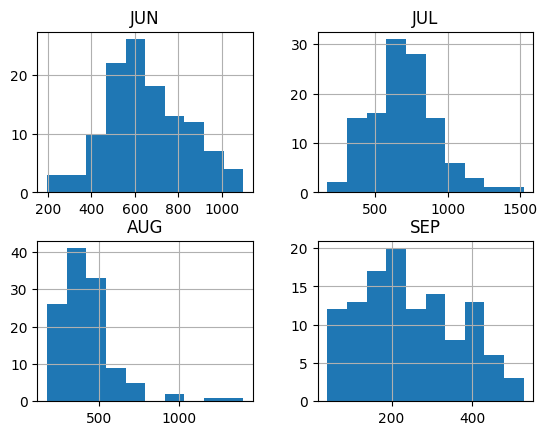

In [9]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [ ]:
pipinstall sklearn

In [8]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.34371257, 0.56582278, 0.23721787, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.08023952, 0.03291139, 0.26347305, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.03832335, 0.23544304, 0.01381852, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.02874251, 0.04810127, 0.16490097, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.02275449, 0.08607595, 0.04053432, ..., 0.24809772, 0.18258007,
        0.18793274],
       [0.34850299, 0.65949367, 0.22339936, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [9]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 1)

In [10]:
#Let's see how our train set looks like
x_train.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
69,12.9,17.6,25.8,132.7,289.1,535.3,558.1,554.8,212.5,278.3,80.5,5.7
95,2.8,9.1,14.4,124.3,74.3,572.4,696.0,327.4,342.7,294.1,89.9,62.5
35,1.2,16.5,116.0,34.0,466.5,620.8,672.1,367.9,286.7,231.7,211.1,18.6
44,4.4,9.9,12.7,104.1,53.4,549.8,704.0,351.8,110.9,253.8,259.5,18.0
85,5.6,18.7,11.2,63.1,126.7,597.9,324.8,340.3,235.4,165.5,194.7,9.5


In [11]:
y_train.head()

69    0
95    0
35    1
44    0
85    0
Name: FLOODS, dtype: int64

# Prediction Algorithm:

# KNN Classifier

In [12]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [13]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1]


In [15]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
94     0
54     1
59     1
115    0
74     1
46     1
31     1
80     1
48     1
97     1
96     1
98     0
2      1
90     1
111    0
56     1
104    1
101    0
67     1
62     0
78     0
17     0
82     0
112    1
Name: FLOODS, dtype: int64


In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [18]:
print(knn_accuracy)

[0.625 1.    1.   ]


In [19]:
knn_accuracy.mean()

0.875

In [21]:
df = pd.read_csv("district wise rainfall normal.csv")
df.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [22]:
wb = df[df['STATE_UT_NAME'] == 'WEST BENGAL']
wb.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
86,WEST BENGAL,COOCH BEHAR,8.9,16.0,32.2,138.9,345.4,668.8,864.9,733.0,470.9,141.3,15.1,8.3,3443.7,24.9,516.5,2737.6,164.7
87,WEST BENGAL,DARJEELING,48.3,33.8,57.7,130.5,262.3,534.7,756.9,645.9,502.8,118.9,16.8,9.9,3118.5,82.1,450.5,2440.3,145.6
88,WEST BENGAL,JALPAIGURI,9.2,17.8,39.7,119.3,339.3,667.3,931.4,670.9,488.3,159.9,18.0,7.2,3468.3,27.0,498.3,2757.9,185.1
89,WEST BENGAL,MALDA,13.6,10.5,14.5,34.8,106.2,216.6,332.9,284.8,283.0,102.5,13.2,6.8,1419.4,24.1,155.5,1117.3,122.5
90,WEST BENGAL,SOUTH DINAJPUR,8.9,13.3,19.0,58.9,167.8,289.3,368.9,248.0,279.7,112.5,13.0,5.6,1584.9,22.2,245.7,1185.9,131.1


In [23]:
wb.shape

(19, 19)

In [24]:
x_pred = wb.iloc[:,2:14]
x_pred.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
86,8.9,16.0,32.2,138.9,345.4,668.8,864.9,733.0,470.9,141.3,15.1,8.3
87,48.3,33.8,57.7,130.5,262.3,534.7,756.9,645.9,502.8,118.9,16.8,9.9
88,9.2,17.8,39.7,119.3,339.3,667.3,931.4,670.9,488.3,159.9,18.0,7.2
89,13.6,10.5,14.5,34.8,106.2,216.6,332.9,284.8,283.0,102.5,13.2,6.8
90,8.9,13.3,19.0,58.9,167.8,289.3,368.9,248.0,279.7,112.5,13.0,5.6


In [25]:
y_pred = knn_clf.predict(x_pred)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [26]:
wb_districts = df['DISTRICT'][df['STATE_UT_NAME']=='WEST BENGAL']
wb_districts

86        COOCH BEHAR
87         DARJEELING
88         JALPAIGURI
89              MALDA
90     SOUTH DINAJPUR
91     NORTH DINAJPUR
96            BANKURA
97            BIRBHUM
98            BURDWAN
99            HOOGHLY
100            HOWRAH
101           PURULIA
102       MURSHIDABAD
103             NADIA
104     NORTH 24 PARG
105     SOUTH 24 PARG
106     EAST MIDNAPOR
107     WEST MIDNAPOR
108           KOLKATA
Name: DISTRICT, dtype: object

In [27]:
wb['Flood'] = y_pred
wb.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_22052\2586958156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wb['Flood'] = y_pred


,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Flood
86,WEST BENGAL,COOCH BEHAR,8.9,16.0,32.2,138.9,345.4,668.8,864.9,733.0,470.9,141.3,15.1,8.3,3443.7,24.9,516.5,2737.6,164.7,1
87,WEST BENGAL,DARJEELING,48.3,33.8,57.7,130.5,262.3,534.7,756.9,645.9,502.8,118.9,16.8,9.9,3118.5,82.1,450.5,2440.3,145.6,1
88,WEST BENGAL,JALPAIGURI,9.2,17.8,39.7,119.3,339.3,667.3,931.4,670.9,488.3,159.9,18.0,7.2,3468.3,27.0,498.3,2757.9,185.1,1
89,WEST BENGAL,MALDA,13.6,10.5,14.5,34.8,106.2,216.6,332.9,284.8,283.0,102.5,13.2,6.8,1419.4,24.1,155.5,1117.3,122.5,0
90,WEST BENGAL,SOUTH DINAJPUR,8.9,13.3,19.0,58.9,167.8,289.3,368.9,248.0,279.7,112.5,13.0,5.6,1584.9,22.2,245.7,1185.9,131.1,0


In [28]:
wb['DISTRICT'][wb['Flood'] == 1]

86    COOCH BEHAR
87     DARJEELING
88     JALPAIGURI
Name: DISTRICT, dtype: object